In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import os
import matplotlib.patches as patches
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from tensorflow.keras import regularizers
from keras.regularizers import l1
from scipy import signal

SEED = 42
keras.utils.set_random_seed(SEED)

In [2]:
# Abre el archivo JSON en modo lectura
with open('dish_dict.json', 'r') as file:
    # Carga los datos desde el archivo JSON
    dish_dict = json.load(file)

with open('food_categories_dict.json', 'r') as file:
    # Carga los datos desde el archivo JSON
    food_categories_dict = json.load(file)
    
with open('hierarchy_dict.json', 'r') as file:
# Carga los datos desde el archivo JSON
    hierarchy_dict = json.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'dish_dict.json'

In [ ]:
# Path de las imágenes y anotaciones
path_images = os.listdir("images/") 

data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

y_train_category = data_train['food_category']
y_train_dish = data_train['dish']
y_train = data_train['classes'].astype('str')


In [ ]:
classes = list(set(data_train['classes'])); classes.sort()
class_encoder = tf.keras.layers.StringLookup(vocabulary=classes, num_oov_indices=0)
class_decoder = tf.keras.layers.StringLookup(vocabulary=classes,  encoding='utf-8', num_oov_indices=0, invert=True)

c:\Users\Investigador\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\numeric.py:2468: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [ ]:
caso='5'
modo='1' # '1': 1 output, '2': 2 output
output_results = f"Results/{modo}/{caso}/"
os.makedirs(output_results, exist_ok=True)

In [ ]:
def recognize(dict,element):
    for rr in dict.keys():
        d=dict[rr]
        for jj in range(len(d)):
            d_e=d[str(jj)]
            if element == d_e:
                return [rr]

def rec(dict,element):
    for rr in dict.keys():
        if element == dict[rr]:
            return(rr)

def extract_img(dir,size):
    Imag = keras.utils.load_img(dir)
    if size!=0:
        Imag = Imag.resize((size, size))
    Imag = keras.utils.img_to_array(Imag)
    return(Imag)

if modo=='2':
    def plot_history(history,ac1,ac2): # Función para visualizar las métricas de entrenamiento y validación
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 7))
        sns.lineplot

        #training
        sns.lineplot(history.history["loss"], ax = axes[0], label="Training Loss")
        sns.lineplot(history.history[f"{ac1}_accuracy"], ax = axes[1], label="Training Accuracy")
        sns.lineplot(history.history[f"{ac2}_accuracy"], ax = axes[2], label="Training Accuracy")

        # Validacion
        sns.lineplot(history.history["val_loss"], ax = axes[0], label="Validation Loss")
        sns.lineplot(history.history[f"val_{ac1}_accuracy"], ax = axes[1], label="Validation Accuracy")
        sns.lineplot(history.history[f"val_{ac2}_accuracy"], ax = axes[2], label="Validation Accuracy")


        axes[0].set_title("Loss Comparison", fontdict = {'fontsize': 15})
        axes[0].set_xlabel("Epoch")
        axes[0].set_ylabel("Loss")

        axes[1].set_title(f"{ac1} Accuracy Comparison", fontdict = {'fontsize': 15})
        axes[1].set_xlabel("Epoch")
        axes[1].set_ylabel("Accuracy")

        axes[2].set_title(f"{ac2} Accuracy Comparison", fontdict = {'fontsize': 15})
        axes[2].set_xlabel("Epoch")
        axes[2].set_ylabel("Accuracy")

        plt.tight_layout()
        fig.savefig(os.path.join(output_results, "Plot_history.png"))
        plt.show()

elif modo=='1':
    def plot_history(history): # Función para visualizar las métricas de entrenamiento y validación
        fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 7))
        sns.lineplot

        #training
        sns.lineplot(history.history["loss"], ax = axes[0], label="Training Loss")
        sns.lineplot(history.history["accuracy"], ax = axes[1], label="Training Accuracy")

        # Validacion
        sns.lineplot(history.history["val_loss"], ax = axes[0], label="Validation Loss")
        sns.lineplot(history.history["val_accuracy"], ax = axes[1], label="Validation Accuracy")


        axes[0].set_title("Loss Comparison", fontdict = {'fontsize': 15})
        axes[0].set_xlabel("Epoch")
        axes[0].set_ylabel("Loss")

        axes[1].set_title("Accuracy Comparison", fontdict = {'fontsize': 15})
        axes[1].set_xlabel("Epoch")
        axes[1].set_ylabel("Accuracy")

        plt.tight_layout()
        fig.savefig(os.path.join(output_results, "Plot_history.png"))
        plt.show()



In [ ]:
X_train=[]
X_test=[]
y_test_category=[]
y_test_dish=[]


image_size = 32

for ii,i in enumerate([data_train,data_test]):
    print(ii)
    path=i['path']

    for j in path:
        if ii==0:
            X_train.append(extract_img(j,image_size))


        elif ii==1:
            X_test.append(extract_img(j,image_size))

            dish=j.split('/')[1]
            category=recognize(hierarchy_dict, dish)[0]
            dish=rec(dish_dict,dish)
            category=rec(food_categories_dict,category)
            y_test_category.append(category)
            y_test_dish.append(dish)

0
1


In [ ]:
X_train, X_val, y_train, y_val, y_train_category, y_val_category, y_train_dish, y_val_dish = train_test_split(np.array(X_train), y_train, y_train_category, y_train_dish, test_size=0.2, random_state=SEED)
X_test=np.array(X_test)
y_test_category=pd.DataFrame(y_test_category)[0]
y_test_dish=pd.DataFrame(y_test_dish)[0]

y_test=[]

for i in range(X_test.shape[0]):
    y_test.append( f'{y_test_category[i]} {y_test_dish[i]}' )

y_test=pd.DataFrame(y_test)
y_test=y_test[0].astype('str')

In [ ]:
print(f'Shape images: {X_train.shape}')
print(f'X_train: {len(X_train)}')
print(f'X_val: {len(X_val)}')
print(f'Y_train: {y_train.shape[0]}')
print(f'Y_train_category: {y_train_category.shape[0]}')
print(f'Y_train_dish: {y_train_dish.shape[0]}')
print(f'Y_val: {y_val.shape[0]}')
print(f'Y_val_category: {y_val_category.shape[0]}')
print(f'Y_val_dish: {y_val_dish.shape[0]}')
print(f'Y_test: {y_test.shape[0]}')
print(f'Y_test_category: {y_test_category.shape[0]}')
print(f'Y_test_dish: {y_test_dish.shape[0]}')

Shape images: (60600, 32, 32, 3)
X_train: 60600
X_val: 15150
Y_train: 60600
Y_train_category: 60600
Y_train_dish: 60600
Y_val: 15150
Y_val_category: 15150
Y_val_dish: 15150
Y_test: 25250
Y_test_category: 25250
Y_test_dish: 25250


In [ ]:
num_classes_dish=len(set(y_train_dish))
num_classes_category=len(set(y_train_category))
num_classes=len(set(data_train['classes']))

In [ ]:
y_train = class_encoder(y_train)  
y_val = class_encoder(y_val)  
y_test = class_encoder(y_test)  


In [ ]:
# if modo=='1':
#     model = get_model_1(X_train, num_classes_dish)
# elif modo=='2':
#     model = get_model_2(X_train, num_classes_category, num_classes_dish)
    
# tf.keras.utils.plot_model(model,to_file=os.path.join(output_results, 'model.png'), show_shapes = True)

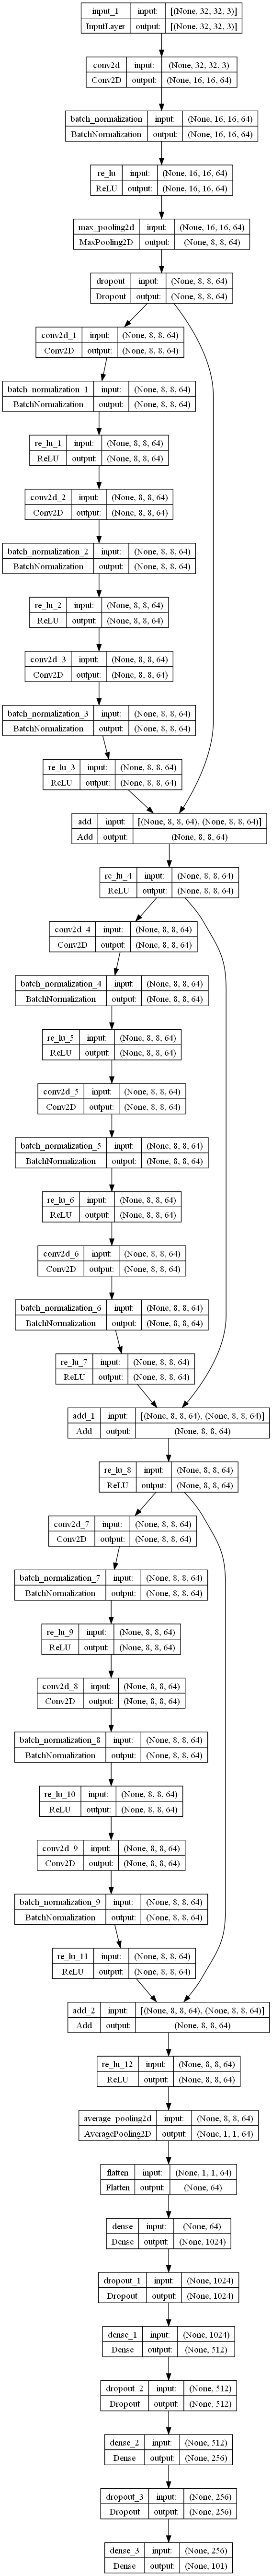

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, AveragePooling2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.models import Model

def residual_block(x, filters, kernel_size=3, stride=1):
    # Shortcut
    shortcut = x
    
    # First convolution
    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    # Second convolution
    x = Conv2D(filters, kernel_size=kernel_size+1, strides=stride+1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, kernel_size=kernel_size+2, strides=stride+2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Add shortcut to the main path
    x = Add()([x, shortcut])
    x = ReLU()(x)

    
    return x

# Input layer
input_tensor = Input(shape=X_train.shape[1:] )

# Initial Convolution
x = Conv2D(64, kernel_size=7, strides=2, padding='same')(input_tensor)
x = BatchNormalization()(x)
x = ReLU()(x)
x =  MaxPooling2D(pool_size = (2,2))(x)
x = Dropout(0.2)(x)

# Residual Blocks
for i in range(5):
    x = residual_block(x, filters=64,kernel_size=3, stride=1)

# Average Pooling
x = AveragePooling2D(pool_size=7)(x)

# Fully Connected Layer
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
output_tensor = Dense(num_classes_dish, activation='softmax')(x)

# Create the ResNet model
model = Model(inputs=input_tensor, outputs=output_tensor)
tf.keras.utils.plot_model(model,to_file=os.path.join(output_results, 'model.png'), show_shapes = True)


In [ ]:
# Hiperparámetros
patience= 10
learning_rate=0.0001
batch_size = 128 ##256#128
ep = 100

my_callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0,patience=patience,verbose=0,mode="auto",baseline=None,restore_best_weights=True,)]
opt=tf.keras.optimizers.AdamW(learning_rate=learning_rate,weight_decay=0.004,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False, clipnorm=None,clipvalue=None,global_clipnorm=None,use_ema=False,ema_momentum=0.99,ema_overwrite_frequency=None,jit_compile=True,name="AdamW")
loss=tf.keras.losses.SparseCategoricalCrossentropy()
metrics=['accuracy']

model.compile(optimizer=opt,
            loss=loss,
            metrics=metrics)

model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 16, 16, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 16, 16, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 16, 16, 64)           0         ['batch_normalization[0][0

In [ ]:
if modo=='1':
    model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=ep, 
                        callbacks=my_callbacks,
                        validation_data=(X_val, y_val) 
                        )
elif modo=='2':
    model_history = model.fit(X_train, [y_train_category, y_train_dish], batch_size=batch_size, epochs=ep, 
                        callbacks=my_callbacks,
                        validation_data=(X_val, [y_val_category, y_val_dish]) 
                        )

model.save(os.path.join(output_results, f'kaggle_{caso}.keras'))

Epoch 1/100
474/474 [==============================] - 84s 175ms/step - loss: 4.5271 - accuracy: 0.0261 - val_loss: 4.3537 - val_accuracy: 0.0512
Epoch 2/100
474/474 [==============================] - 82s 173ms/step - loss: 4.2803 - accuracy: 0.0532 - val_loss: 4.1847 - val_accuracy: 0.0646
Epoch 3/100
474/474 [==============================] - 82s 173ms/step - loss: 4.1331 - accuracy: 0.0743 - val_loss: 4.0262 - val_accuracy: 0.0928
Epoch 4/100
474/474 [==============================] - 82s 173ms/step - loss: 4.0174 - accuracy: 0.0920 - val_loss: 4.0725 - val_accuracy: 0.0881
Epoch 5/100
474/474 [==============================] - 82s 174ms/step - loss: 3.9137 - accuracy: 0.1088 - val_loss: 3.9382 - val_accuracy: 0.1072
Epoch 6/100
474/474 [==============================] - 81s 170ms/step - loss: 3.8319 - accuracy: 0.1206 - val_loss: 3.8233 - val_accuracy: 0.1256
Epoch 7/100
474/474 [==============================] - 81s 171ms/step - loss: 3.7598 - accuracy: 0.1332 - val_loss: 3.8208 -

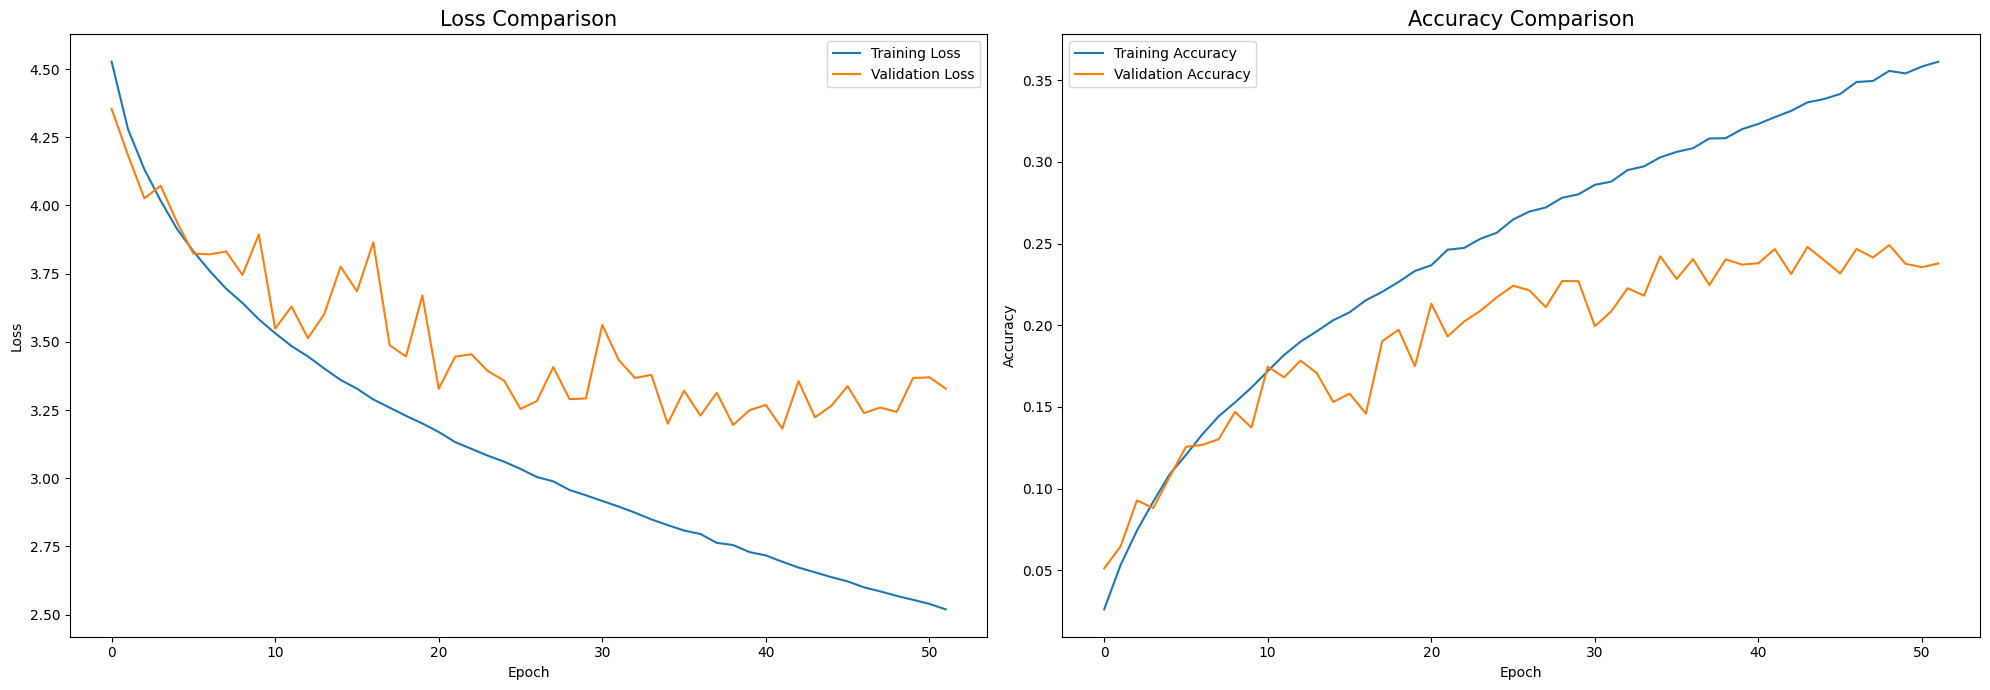

In [ ]:
if modo=='2':
    plot_history(model_history,'dense_72','dense_77') 
elif modo=='1':
    plot_history(model_history)

In [ ]:
if modo=='2':
    y_test_category=y_test_category.astype('int64')
    y_test_dish=y_test_dish.astype('int64')
    prob_pred = model.predict(X_test)
    num_pred_category= np.argmax(prob_pred[0], axis=1)
    num_pred_dish= np.argmax(prob_pred[1], axis=1)
    test_acc = model.evaluate(X_test, [y_test_category, y_test_dish],verbose=1)

    print('\nTest loss:', test_acc[0])
    print('\nTest category loss:', test_acc[1])
    print('\nTest dish loss:', test_acc[2])
    print('\nTest category accuracy:', test_acc[3])
    print('\nTest dish accuracy:', test_acc[4])

elif modo=='1':
    prob_pred = model.predict(X_test)
    num_pred= np.argmax(prob_pred, axis=1)
    test_acc = model.evaluate(X_test, y_test)

    print('\nTest loss:', test_acc[0])
    print('\nTest caccuracy:', test_acc[1])


790/790 [==============================] - 15s 19ms/step - loss: 3.1790 - accuracy: 0.2479

Test loss: 3.178966522216797

Test caccuracy: 0.24792079627513885


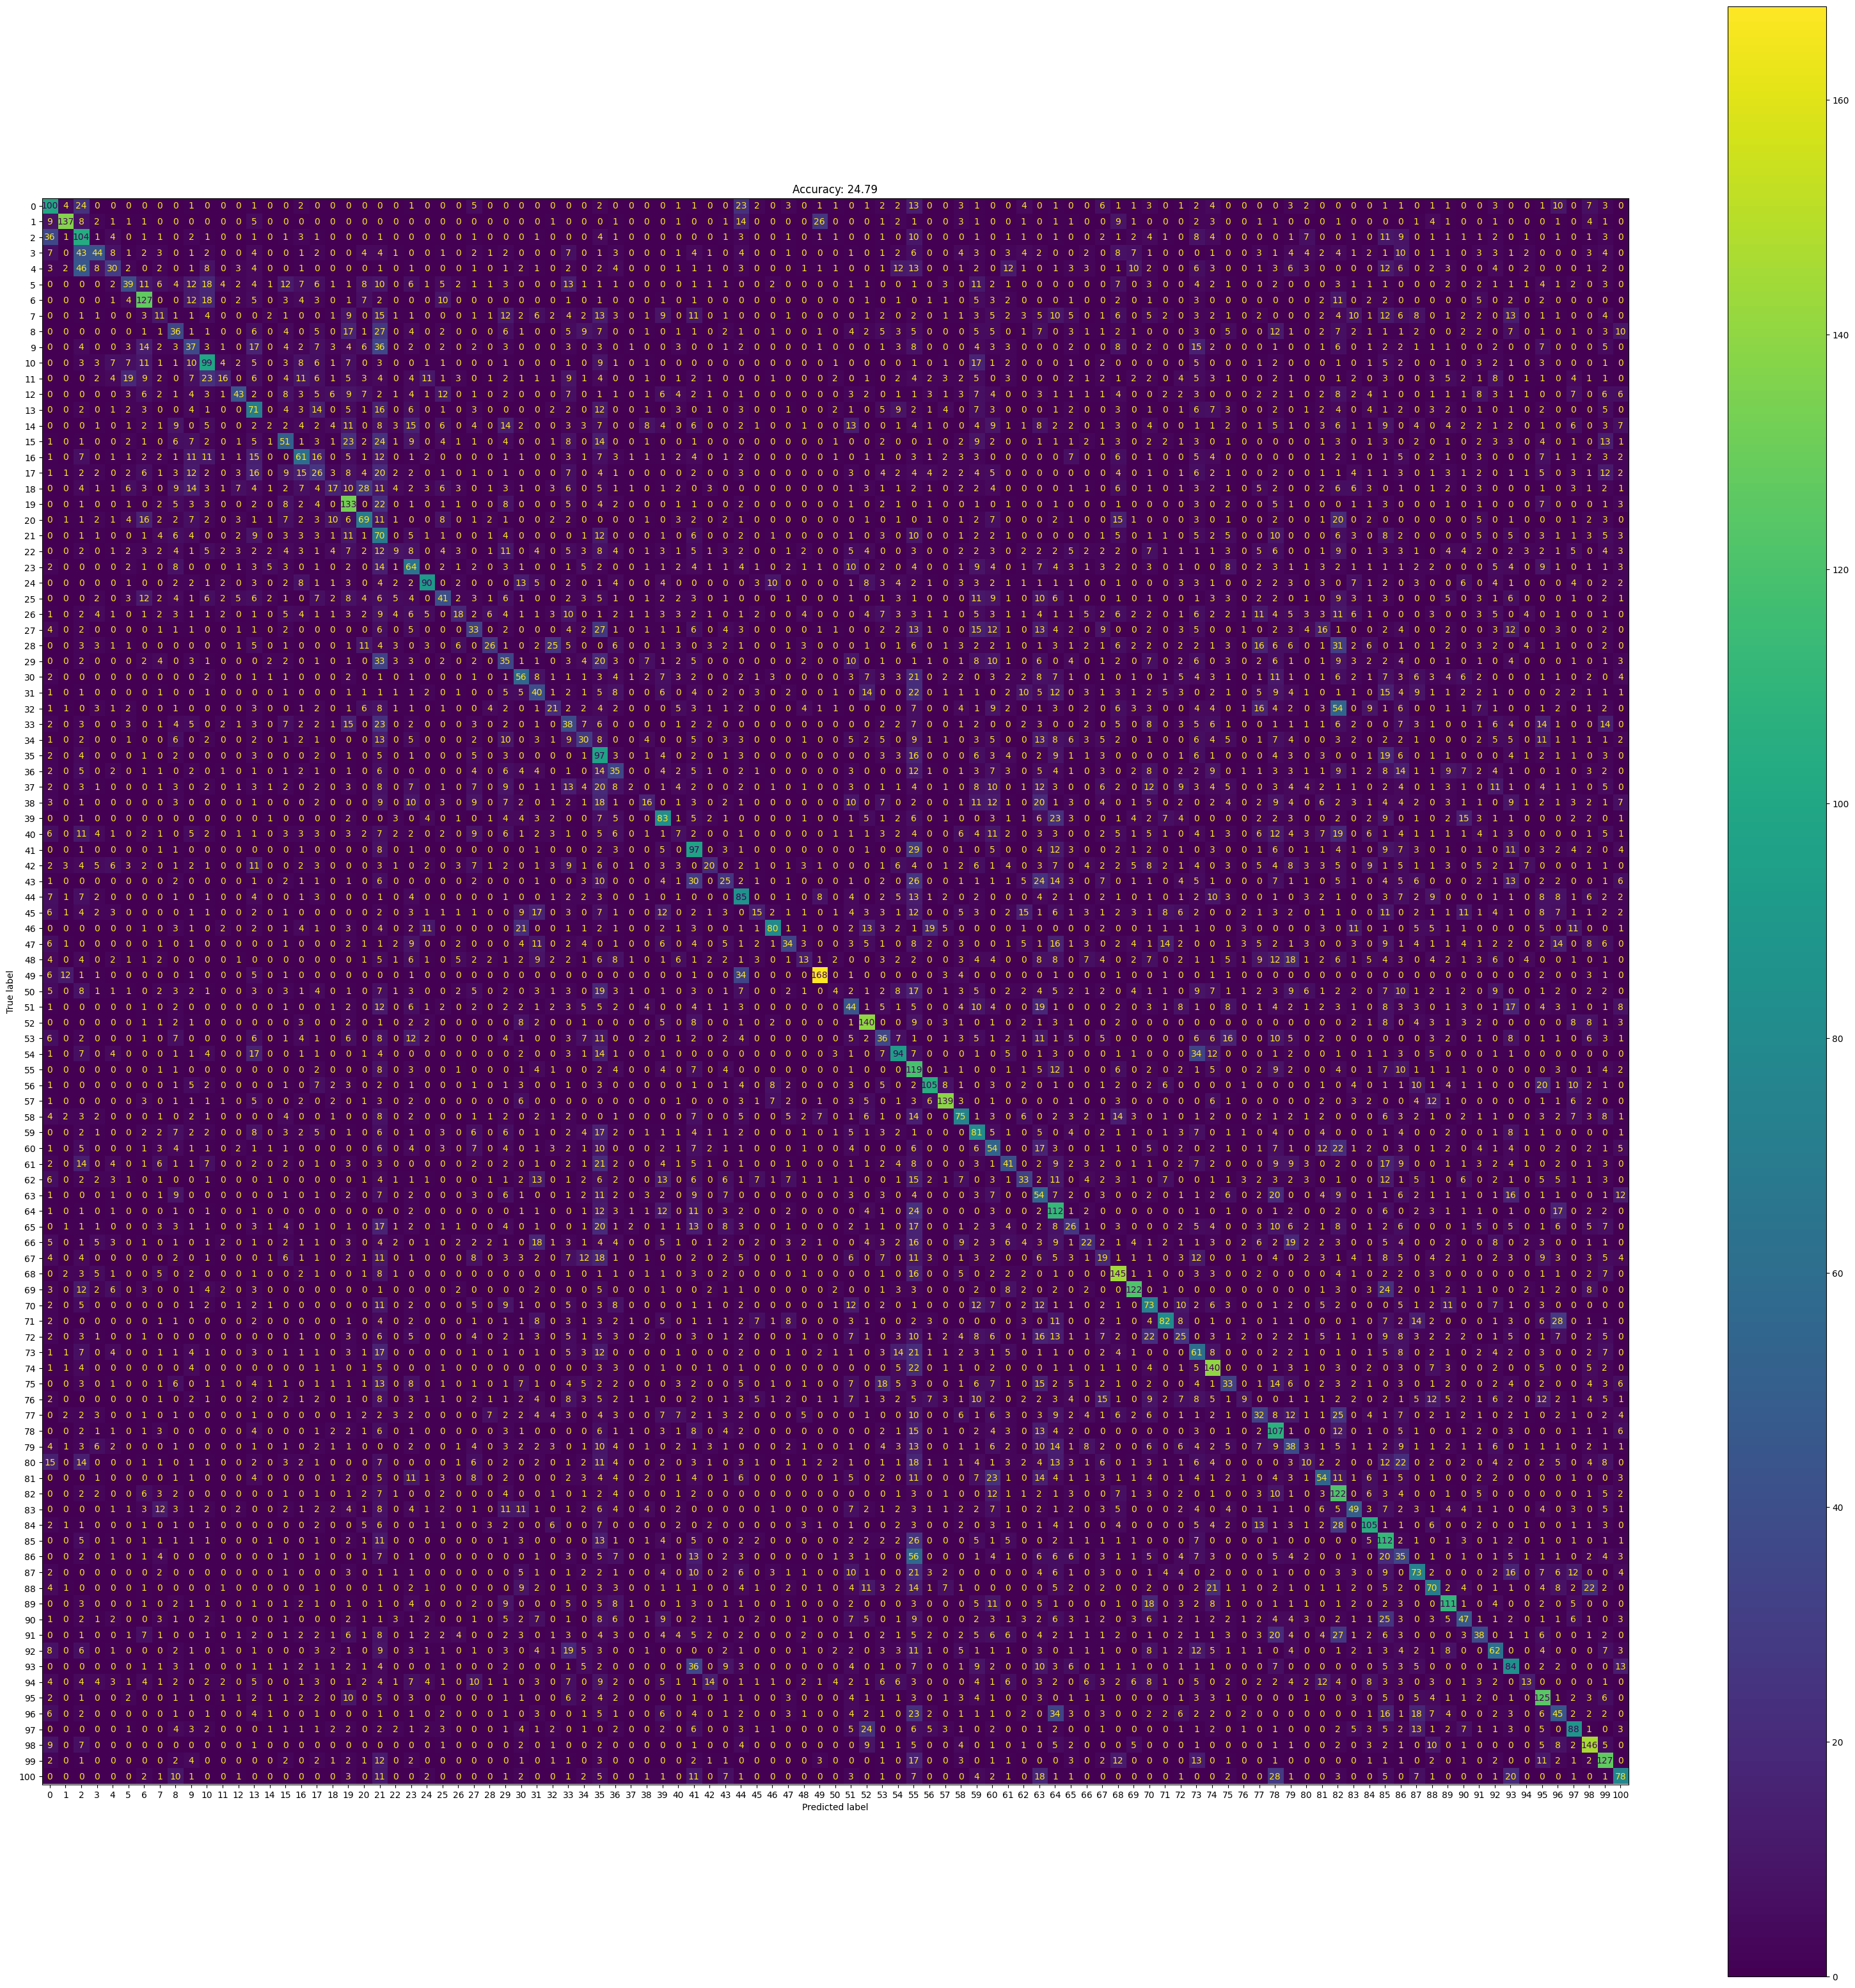

In [ ]:
if modo=='1':
    # Graficando Matriz de confusion
    cm_ann = confusion_matrix(y_test, num_pred)
    disp_ann  = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=set(y_train_dish))

    fig, axes = plt.subplots(figsize=(40,40))

    disp_ann.plot(ax=axes)
    axes.set_title(f'Accuracy: {round(test_acc[1]*100,2)}')
    plt.show()

    fig.savefig(os.path.join(output_results, 'confusion.png'))
    #plt.close(fig)

In [ ]:
if modo=='2':
    # Graficando Matriz de confusion
    cm_ann = confusion_matrix(y_test_category, num_pred_category)
    disp_ann  = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=set(y_train_category))

    fig, axes = plt.subplots(figsize=(10,10))

    disp_ann.plot(ax=axes)
    axes.set_title(f'Food category: {round(test_acc[3]*100,2)}')
    plt.show()

    fig.savefig(os.path.join(output_results, 'category.png'))
    #plt.close(fig)

In [ ]:
if modo=='2':
    # Graficando Matriz de confusion
    cm_ann = confusion_matrix(y_test_dish, num_pred_dish)
    disp_ann  = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=set(y_train_dish))

    fig, axes = plt.subplots(figsize=(40,40))

    disp_ann.plot(ax=axes)
    axes.set_title(f'Dish: {round(test_acc[4]*100,2)}')
    plt.show()
    fig.savefig(os.path.join(output_results, 'dish.png'))
    #plt.close(fig)

In [ ]:
if modo =='2':
    num_pred_category=num_pred_category.astype('str')
    num_pred_dish=num_pred_dish.astype('str') 
    y=[]

    for i in range(num_pred_category.shape[0]):
        y.append( f'{num_pred_category[i]} {num_pred_dish[i]}' )
        
    data_test['classes']=y
    data_test.to_csv(os.path.join(output_results, 'submission_file.csv'))
    data_test

if modo=='1':
    data_test['classes']=np.array(class_decoder(num_pred)).astype('str')
    data_test.to_csv(os.path.join(output_results, 'submission_file.csv'),index=False)

In [ ]:
data_test

,path,classes
0,images/caprese_salad/820512.jpg,2 84
1,images/hamburger/2062556.jpg,2 48
2,images/lasagna/2381454.jpg,2 51
3,images/ceviche/1995.jpg,2 88
4,images/poutine/892377.jpg,2 54
...,...,...
25245,images/ravioli/2087725.jpg,2 62
25246,images/ice_cream/504131.jpg,1 6
25247,images/cannoli/1187751.jpg,1 8
25248,images/pancakes/477236.jpg,2 78
